In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Formula-1-Drives data upto 2019/champions list.csv")

In [4]:
data.head()

0            driver  races  first  second  third  podiums  poles  fastest  \
0  1    Lewis Hamilton    250     84      39     28      151     88       47   
1  2  Sebastian Vettel    240     53      35     32      120     57       38   
2  3   Fernando Alonso    311     32      37     28       97     22       23   
3  4    Kimi Räikkönen    313     21      37     45      103     18       46   
4  5      Nico Rosberg    206     23      25      9       57     30       20   

   points  ...  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  \
0  3431.0  ...          NaN          NaN          NaN          NaN   
1  2985.0  ...          NaN          NaN          NaN          NaN   
2  1899.0  ...          NaN          NaN          NaN          NaN   
3  1854.0  ...          NaN          NaN          NaN          NaN   
4  1594.5  ...          NaN          NaN          NaN          NaN   

   Unnamed: 16    2019  Lewis Hamilton  Mercedes Mercedes.1 Mercedes.2  
0          NaN  2018.0  Lewis Hamilton  Mercedes   Mercedes   Mercedes  
1          NaN  2017.0  Lewis Hamilton  Mercedes   Mercedes   Mercedes  
2          NaN  2016.0    Nico Rosberg  Mercedes   Mercedes   Mercedes  
3          NaN  2015.0  Lewis Hamilton  Mercedes   Mercedes   Mercedes  
4          NaN  2014.0  Lewis Hamilton  Mercedes   Mercedes   Mercedes  

[5 rows x 22 columns]

In [5]:
data.describe()

0      races       first      second       third     podiums  \
count  100.000000  100.00000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  135.61000    9.880000    9.470000    8.930000   28.280000   
std     29.011492   70.79304   15.305165    9.695834    7.992743   29.828832   
min      1.000000   21.00000    0.000000    0.000000    0.000000    0.000000   
25%     25.750000   86.00000    1.000000    2.000000    4.000000   10.000000   
50%     50.500000  119.50000    5.000000    7.000000    7.000000   19.500000   
75%     75.250000  176.00000   12.000000   13.000000   12.000000   35.000000   
max    100.000000  322.00000   91.000000   43.000000   45.000000  155.000000   

           poles     fastest       points  is_champion  Unnamed: 11  \
count  100.00000  100.000000   100.000000   100.000000          0.0   
mean     9.80000    9.750000   393.138600     0.330000          NaN   
std     15.14509   12.221338   560.141284     0.472582          NaN   
min      0.00000    0.000000    67.000000     0.000000          NaN   
25%      0.00000    2.000000   118.000000     0.000000          NaN   
50%      4.00000    6.000000   193.750000     0.000000          NaN   
75%     13.00000   13.000000   360.000000     1.000000          NaN   
max     88.00000   77.000000  3431.000000     1.000000          NaN   

       Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
count          0.0          0.0          0.0          0.0          0.0   
mean           NaN          NaN          NaN          NaN          NaN   
std            NaN          NaN          NaN          NaN          NaN   
min            NaN          NaN          NaN          NaN          NaN   
25%            NaN          NaN          NaN          NaN          NaN   
50%            NaN          NaN          NaN          NaN          NaN   
75%            NaN          NaN          NaN          NaN          NaN   
max            NaN          NaN          NaN          NaN          NaN   

              2019  
count    69.000000  
mean   1984.000000  
std      20.062403  
min    1950.000000  
25%    1967.000000  
50%    1984.000000  
75%    2001.000000  
max    2018.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   0               100 non-null    int64  
 1   driver          100 non-null    object 
 2   races           100 non-null    int64  
 3   first           100 non-null    int64  
 4   second          100 non-null    int64  
 5   third           100 non-null    int64  
 6   podiums         100 non-null    int64  
 7   poles           100 non-null    int64  
 8   fastest         100 non-null    int64  
 9   points          100 non-null    float64
 10  is_champion     100 non-null    int64  
 11  Unnamed: 11     0 non-null      float64
 12  Unnamed: 12     0 non-null      float64
 13  Unnamed: 13     0 non-null      float64
 14  Unnamed: 14     0 non-null      float64
 15  Unnamed: 15     0 non-null      float64
 16  Unnamed: 16     0 non-null      float64
 17  2019            69 non-null     floa

In [7]:
X = data[data.columns[2:10]]
X.head()

races  first  second  third  podiums  poles  fastest  points
0    250     84      39     28      151     88       47  3431.0
1    240     53      35     32      120     57       38  2985.0
2    311     32      37     28       97     22       23  1899.0
3    313     21      37     45      103     18       46  1854.0
4    206     23      25      9       57     30       20  1594.5

In [10]:
# Column with labels
y = data.is_champion

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

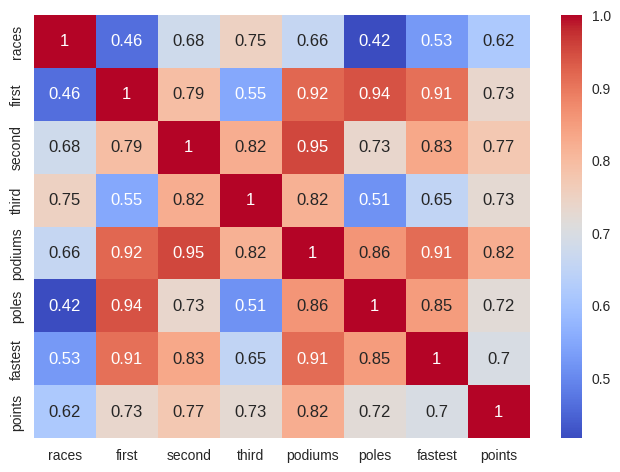

In [40]:
#correlation graph
import seaborn as sns
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size = 0.3)

In [17]:
from sklearn.linear_model import LogisticRegression

champ_pred = LogisticRegression()
champ_pred.fit(X_train, y_train)

LogisticRegression()

In [18]:
from sklearn.model_selection import cross_val_score as cvs

cv_score = cvs(champ_pred, X_train, y_train, cv = 3, scoring = 'accuracy')

print(f' The min score is {min(cv_score):.2f}')
print(f' The mean score is {np.mean(cv_score):.2f}')
print(f' The max score is {max(cv_score):.2f}')

 The min score is 0.78
 The mean score is 0.84
 The max score is 0.88


[[-0.903402316007527,
  1.633208389673457,
  0.7780920420050467,
  -0.4964924747486781,
  0.9578799111173198,
  0.5843671828877364,
  0.3712572384574646,
  -0.39838190885531294]]

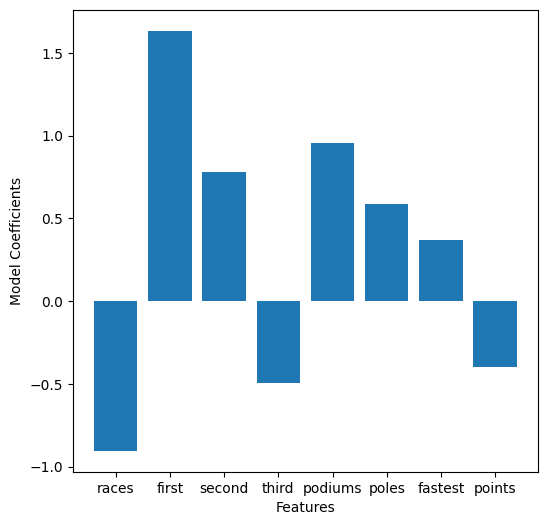

In [19]:
y_pos = np.arange(len(list(X.columns)))
bar_labels = X.columns
coef = champ_pred.coef_
coefs = [i.tolist() for i in coef]


fig, ax = plt.subplots(figsize = (6,6))
plt.bar(y_pos, [val for sublist in coefs for val in sublist])
plt.xticks(y_pos, bar_labels)
plt.xlabel('Features')
plt.ylabel('Model Coefficients')
coefs

In [20]:
#Training a second linear model for results comparisons
from sklearn.linear_model import SGDClassifier as SGDC
sgdc_model = SGDC(random_state = 42)
sgdc_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score as cvs

cv_score = cvs(sgdc_model, X_train, y_train, cv = 3, scoring = 'accuracy')

print(f' The min score is {min(cv_score):.2f}')
print(f' The mean score is {np.mean(cv_score):.2f}')
print(f' The max score is {max(cv_score):.2f}')

 The min score is 0.78
 The mean score is 0.83
 The max score is 0.91


In [22]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc_model = RFC(n_estimators = 10)
rfc_model.fit(X_train, y_train)

rfc_model.score(X_train, y_train)

0.9857142857142858

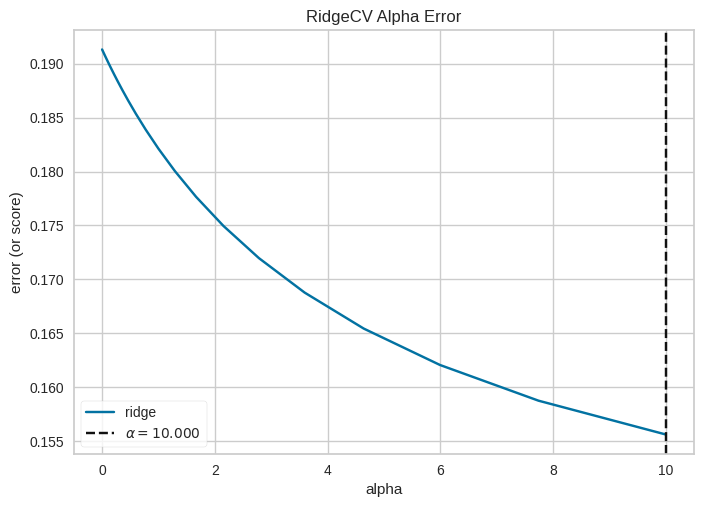

<Axes: title={'center': 'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [23]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 100)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X_train, y_train)
visualizer.show()

In [24]:
#Training a ridge classification model
from sklearn.linear_model import RidgeClassifier as RC
rc_model = RC(alpha = 5.9, random_state = 42)
rc_model.fit(X_train, y_train)

RidgeClassifier(alpha=5.9, random_state=42)

In [25]:
#rcv is ridge cross validation
rcv_score = cvs(rc_model, X_train, y_train, cv = 3, scoring = 'accuracy')

print(f' The min score is {min(rcv_score):.2f}')
print(f' The mean score is {np.mean(rcv_score):.2f}')
print(f' The max score is {max(rcv_score):.2f}')

 The min score is 0.70
 The mean score is 0.80
 The max score is 0.87


In [26]:
from sklearn.model_selection import cross_val_predict as cvp

y_train_pred = cvp(sgdc_model, X_train, y_train, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix as cm

confusion_m = cm(y_train, y_train_pred)
confusion_m

array([[42,  4],
       [ 8, 16]])

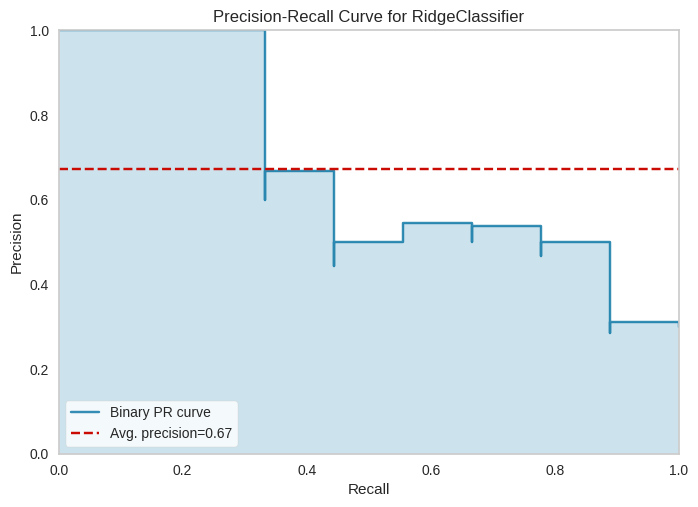

<Axes: title={'center': 'Precision-Recall Curve for RidgeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [28]:
from yellowbrick.classifier import PrecisionRecallCurve
#creating a precision vs recall curve
viz = PrecisionRecallCurve(rc_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [29]:
from sklearn.metrics import precision_score as ps, recall_score as rs

pres_scr = ps(y_train, y_train_pred)
recal_scr = rs(y_train, y_train_pred)

print(f' Precision Score = {pres_scr:.2f}')
print(f' Recall Score = {recal_scr:.2f}')

 Precision Score = 0.80
 Recall Score = 0.67


In [30]:
hamilton = np.array(X_train[0]).reshape(1,8)
hamilton_score = rc_model.decision_function(hamilton)
hamilton_score

array([0.22615573])

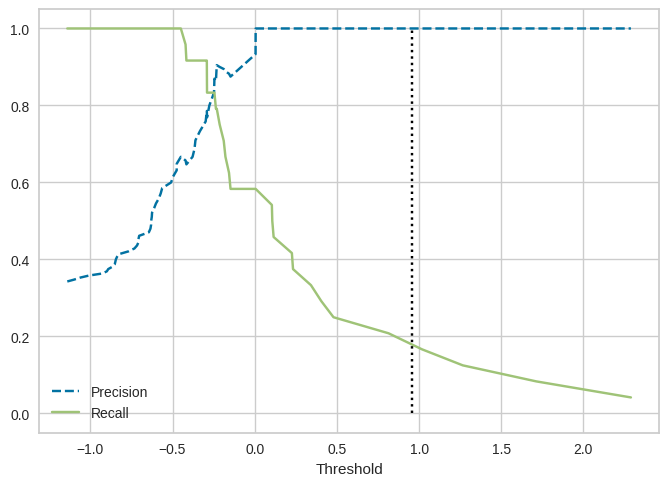

In [31]:
from sklearn.metrics import precision_recall_curve as prc
y_scores = rc_model.decision_function(X_train)
precisions, recalls, thresholds = prc(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.vlines(0.96, 0, 1, linestyle = 'dotted', color = 'black')
plt.xlabel("Threshold")
plt.legend()
plt.show()

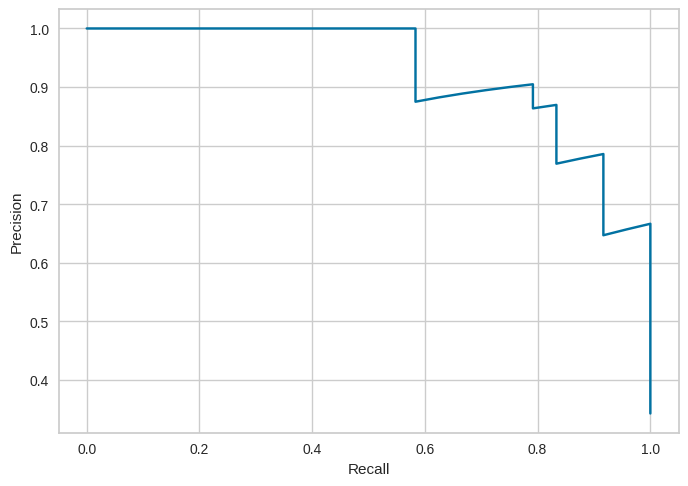

In [32]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [33]:
#wins modeling
wins_model = LogisticRegression()
wins_model.fit(np.array(X['first']).reshape(-1,1), y)

#generate the win probabilities
win_samples = np.arange(0, 20, 1)
win_probs= []

for i in win_samples:
    win_loss, win_win = wins_model.predict_proba([[i]])[0]
    win_probs.append(win_win)

#points modeling
points_model = LogisticRegression()
points_model.fit(np.array(X['points']).reshape(-1,1), y)

#generate points probabilities
point_samples = np.arange(0, 4000, 1)
point_probs = []

for i in point_samples:
    point_loss, point_win = points_model.predict_proba([[i]])[0]
    point_probs.append(point_win)

#pole position modeling
poles_model = LogisticRegression()
poles_model.fit(np.array(X['poles']).reshape(-1,1), y)

#generate pole position probabilities to predict world champion probabilities
pole_samples = np.arange(0, 90, 1)
pole_probs = []

for i in pole_samples:
    pole_loss, pole_win = poles_model.predict_proba([[i]])[0]
    pole_probs.append(pole_win)

Text(0.5, 1.0, 'Probability of Becoming a World Champion Based on Cumulative Pole Positions')

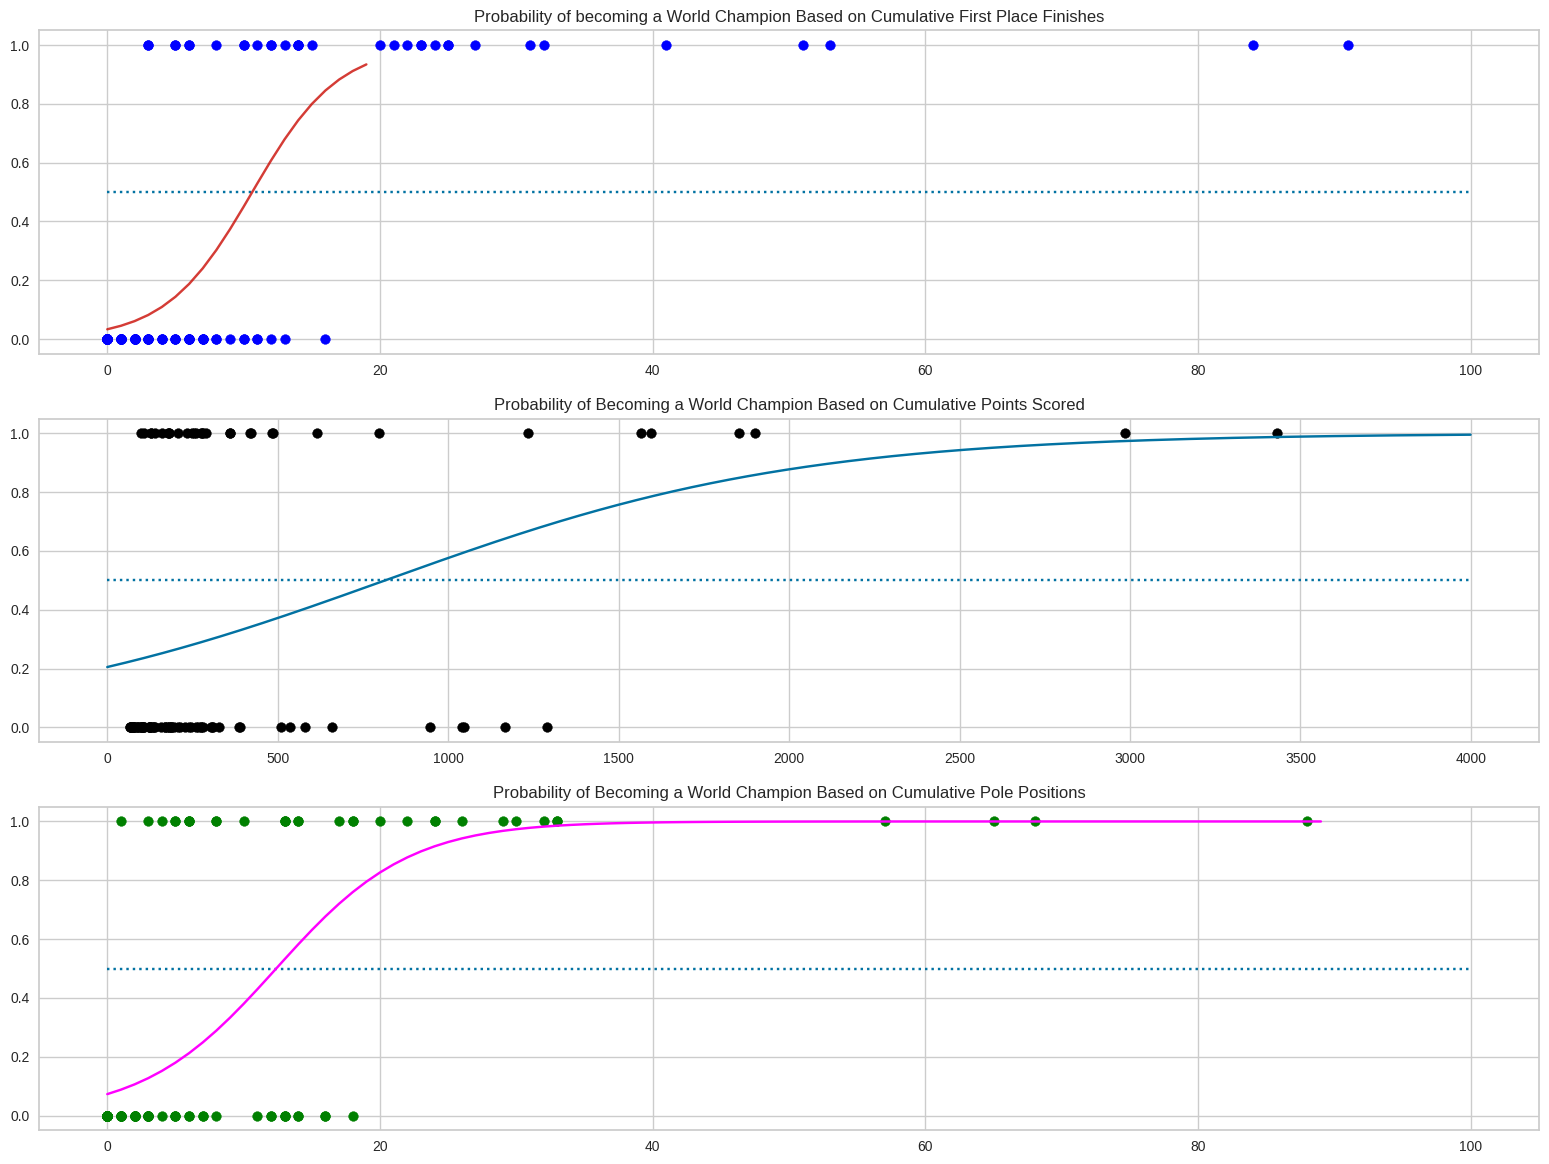

In [34]:
fig, axs = plt.subplots(3)
plt.subplots_adjust(bottom = 1, top = 3, right = 2)

axs[0].scatter(data['first'], y, color = 'blue')
axs[0].hlines(0.5, 0, 100, linestyle = 'dotted', label = '50%')
axs[0].plot(win_samples, win_probs, alpha = 0.8, color = 'r')
axs[0].set_title('Probability of becoming a World Champion Based on Cumulative First Place Finishes')

axs[1].scatter(data.points, y, color = 'black')
axs[1].hlines(0.5, 0, 4000, linestyle = 'dotted', label = '50%')
axs[1].plot(point_samples, point_probs)
axs[1].set_title('Probability of Becoming a World Champion Based on Cumulative Points Scored')

axs[2].scatter(data.poles, y, color = 'green')
axs[2].hlines(0.5, 0, 100, linestyle = 'dotted', label = '50%')
axs[2].plot(pole_samples, pole_probs, color = 'magenta')
axs[2].set_title('Probability of Becoming a World Champion Based on Cumulative Pole Positions')

In [35]:
#marry up win samples on the left and probabilites on the right
from pandas import Series

winner_prob = Series(win_probs, win_samples)
winner_prob

0     0.033378
1     0.045246
2     0.061068
3     0.081946
4     0.109134
5     0.143927
6     0.187478
7     0.240506
8     0.302940
9     0.373608
10    0.450117
11    0.529060
12    0.606576
13    0.679073
14    0.743852
15    0.799417
16    0.845434
17    0.882446
18    0.911522
19    0.933945
dtype: float64

In [36]:
future_champs = data[(
    data['first'] < 11)
    & (data['first'] > 6)
    & (data['races'] < 200)]

future_champs[['driver','first']]

driver  first
6      Valtteri Bottas      7
10    Daniel Ricciardo      7
11      Max Verstappen      8
28  Juan Pablo Montoya      7
40      Jody Scheckter     10
41         Denny Hulme      8
48     Ronnie Peterson     10
53          Jacky Ickx      8
54         René Arnoux      7
57          James Hunt     10